In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import cross_decomposition
import seaborn as sns
import keras
from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

from scipy import stats
import statsmodels.api as sm
from itertools import product
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('/content/drive/MyDrive/data/crypto-markets.csv')
# , parse_dates=['date'], index_col='date', date_parser=dateparse)
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [ ]:
print(df.info)

<bound method DataFrame.info of              slug symbol       name  ...        market  close_ratio   spread
0         bitcoin    BTC    Bitcoin  ...  1.488567e+09       0.5438     3.88
1         bitcoin    BTC    Bitcoin  ...  1.603769e+09       0.7813    13.49
2         bitcoin    BTC    Bitcoin  ...  1.542813e+09       0.3843    12.88
3         bitcoin    BTC    Bitcoin  ...  1.298955e+09       0.2882    32.17
4         bitcoin    BTC    Bitcoin  ...  1.168517e+09       0.3881    33.32
...           ...    ...        ...  ...           ...          ...      ...
942292  project-x  NANOX  Project-X  ...  1.622000e+03       0.5728  5441.80
942293  project-x  NANOX  Project-X  ...  1.823000e+03       0.9003  4449.20
942294  project-x  NANOX  Project-X  ...  1.913000e+03       0.8518  5347.00
942295  project-x  NANOX  Project-X  ...  1.788000e+03       0.4421  3124.52
942296  project-x  NANOX  Project-X  ...  1.654000e+03       0.5180  4046.07

[942297 rows x 13 columns]>


In [ ]:
#check for null values
df.isna().sum()

slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64

In [ ]:
df.dtypes

slug            object
symbol          object
name            object
date            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume         float64
market         float64
close_ratio    float64
spread         float64
dtype: object

In [ ]:
#Transform date to date object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
print(df.dtypes)

slug                   object
symbol                 object
name                   object
date           datetime64[ns]
ranknow                 int64
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
market                float64
close_ratio           float64
spread                float64
dtype: object


In [ ]:
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52


In [ ]:
# # Get a df containing only the latest date's data for each currency
# print("Latest crypto data")
# latest_df = df[df['date'] == '2018-11-29']
# latest_df.head()

In [ ]:
# ##################################################################
# # Get a list of the top x currencies
# x=20 #default no of currencies we will look at
# latest_df[latest_df['ranknow'] <= x].groupby('ranknow').name.unique()
# # Plot the top X currencies latest marketval
# name = latest_df['name'].unique()
# currency  = []
# marketval = []
# x_currencies = name[:x]
# for i, cn in enumerate(x_currencies):
#      filtered = latest_df[(latest_df['name']==str(cn))]
#      currency.append(str(cn))
#      marketval.append(filtered['market'].values[0])

# f, ax = plt.subplots(figsize=(20, 8)) 
# g = sns.barplot( y = currency, x = marketval, palette=sns.cubehelix_palette(x, reverse=True))
# plt.xlabel('Market Cap')
# plt.ylabel('Crytocurrency')
# plt.title("Top 20 Cryptocurrencies Market cap (as on the last data available)")
# ax.set_xticklabels(ax.get_xticks())
# fig=plt.gcf()
# plt.show()

In [ ]:
# Convert date to real date
df['date'] = pd.to_datetime(df['date'])
df['market_billion'] = df['market'] / 1000000000
df['volume_million'] = df['volume'] / 1000000000
df['volume_billion'] = df['volume']

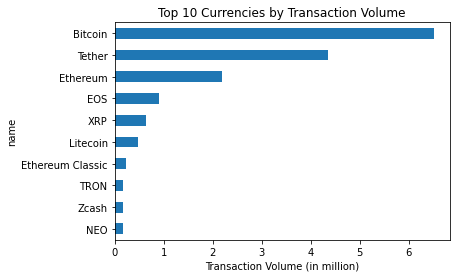

In [ ]:
# fig, (ax, ax1, ax2)=plt.subplots(3,1,figsize=(8,8))

# fig.tight_layout(pad=3)
# ax.plot(df.groupby(['name'])['volume_million'].last().sort_values(ascending=False).head(10).sort_values())
# ax1.plot(df.groupby(['name'])['market_billion'].last().sort_values(ascending=False).head(10).sort_values())
# ax2.plot(df.groupby(['name'])['volume_million'].last().sort_values(ascending=False).head(10).sort_values())

ax = df.groupby(['name'])['volume_million'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Transaction Volume (in million)");
ax.set_title("Top 10 Currencies by Transaction Volume");

# ax1 = df.groupby(['name'])['close'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
# # ax1.set_xlabel("Market Cap (in billion)");
# ax1.set_title("Top 10 Currencies by Market Cap");

# ax2 = df.groupby(['name'])['close'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
# # ax2.set_xlabel("Closing Price");
# ax2.set_title("Top 10 Currencies by Closing Price");



In [ ]:
top_5_currency_names = df.groupby(['name'])['market'].last().sort_values(ascending=False).head(5).index
data_top_5_currencies = df[df['name'].isin(top_5_currency_names)]
data_top_5_currencies.head(5)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_million,volume_billion
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88,1.488567,0.0,0.0
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49,1.603769,0.0,0.0
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88,1.542813,0.0,0.0
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17,1.298955,0.0,0.0
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32,1.168517,0.0,0.0


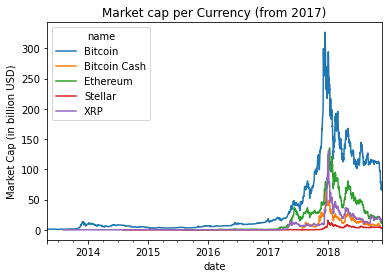

In [ ]:
ax = data_top_5_currencies.groupby(['date', 'name'])['market_billion'].mean().unstack().plot();
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Market cap per Currency (from 2017)");

Text(0.5, 1.0, 'Transaction Volume per Currency (from 2017)')

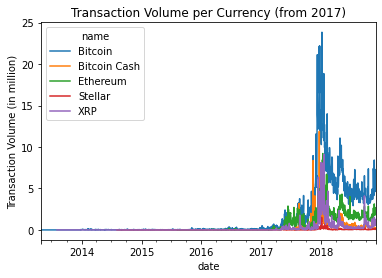

In [ ]:
ax = data_top_5_currencies.groupby(['date', 'name'])['volume_million'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency (from 2017)")

# [data_top_5_currencies.date.dt.year >= 2017]

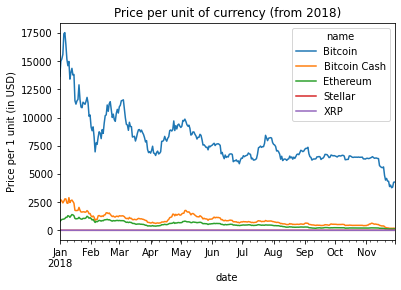

In [ ]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2018].groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency (from 2018)");

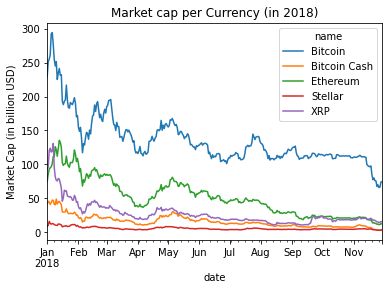

In [ ]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2018].groupby(['date', 'name'])['market_billion'].mean().unstack().plot();
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Market cap per Currency (in 2018)");

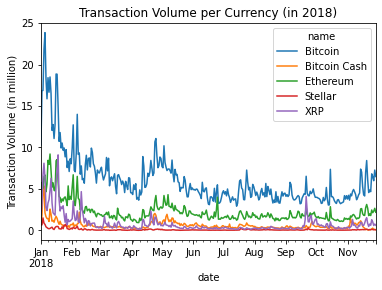

In [ ]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2018].groupby(['date', 'name'])['volume_million'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency (in 2018)");

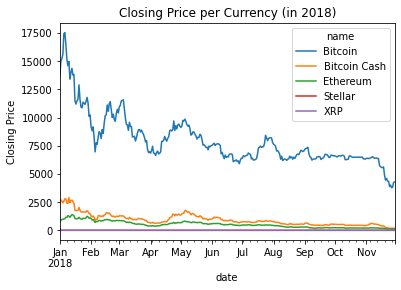

In [ ]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2018].groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Closing Price");
plt.title("Closing Price per Currency (in 2018)");

In [ ]:
is_bitcoin = df['symbol'] == 'BTC'
is_ethereum = df['symbol'] == 'ETH'
is_ripple  = df['symbol'] == 'XRP'

is_42coin = df['symbol'] == '42'
is_bit20 = df['symbol'] == 'BTWTY'
is_projx  = df['symbol'] == 'NANOX'

data_top_currencies = df[is_bitcoin | is_ethereum | is_ripple]
data_top_currencies_close = df[is_bit20 | is_42coin | is_projx]

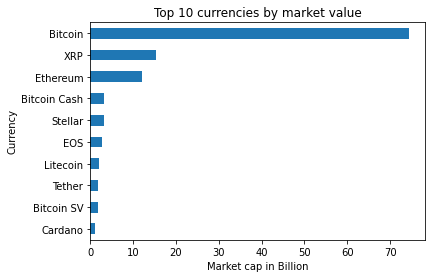

In [ ]:
top10Currencies_mc = df.groupby('name')['market_billion'].last().sort_values(ascending=False).head(10)
ax = top10Currencies_mc.sort_values().plot(kind='barh')
ax.set_xlabel("Market cap in Billion");
ax.set_ylabel("Currency");
plt.title("Top 10 currencies by market value");

In [ ]:
top10Currencies_mc

name
Bitcoin         74.451017
XRP             15.306739
Ethereum        12.166286
Bitcoin Cash     3.164359
Stellar          3.162026
EOS              2.738537
Litecoin         2.006242
Tether           1.851553
Bitcoin SV       1.714035
Cardano          1.085456
Name: market_billion, dtype: float64

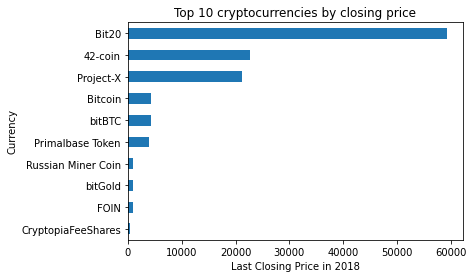

In [ ]:
top10Currencies_lc = df.groupby('name')['close'].last().sort_values(ascending=False).head(10)
ax = top10Currencies_lc.sort_values().plot(kind='barh')
ax.set_xlabel("Last Closing Price in 2018");
ax.set_ylabel("Currency");
plt.title("Top 10 cryptocurrencies by closing price");

In [ ]:
top10Currencies_lc

name
Bit20                 59274.96
42-coin               22665.93
Project-X             21136.72
Bitcoin                4278.85
bitBTC                 4239.62
Primalbase Token       3963.08
Russian Miner Coin      994.75
bitGold                 980.01
FOIN                    918.27
CryptopiaFeeShares      385.21
Name: close, dtype: float64

In [ ]:
# ax = data_top_currencies.groupby(['date', 'name'])['close'].mean().unstack().plot()
# ax.set_ylabel("Price per 1 unit (in USD)")
# plt.title("Price per unit of Top 3 currencies (by market value) by the mean of closing price throughout the years");

In [ ]:
# ax = data_top_currencies_close.groupby(['date', 'name'])['close'].mean().unstack().plot()
# ax.set_ylabel("Price per 1 unit (in USD)")
# plt.title("Price per unit of top 3 currencies (ranked by last closing price) by the mean of closing price throughout the years")

In [ ]:
closing_prices_bitcoin_and_ethereum = df[is_bitcoin | is_ethereum].groupby(['date','name'])['close'].last().unstack().reset_index()
closing_prices_bit20_42coin_and_projx = df[is_bit20 | is_42coin | is_projx].groupby(['date','name'])['close'].last().unstack().reset_index()

closing_prices_other_currencies_mc = df[df['name'].isin(top10Currencies_mc.index) & ~is_bitcoin & ~is_ethereum].groupby(['date','name'])['close'].last().unstack().reset_index()
closing_prices_other_currencies_lc = df[df['name'].isin(top10Currencies_lc.index) & ~is_bit20 & ~is_42coin & ~is_projx].groupby(['date','name'])['close'].last().unstack().reset_index()

In [ ]:
def plot_with_textvalue(df):
    ax = df.plot(kind='bar')
    
    ax.set_ylabel("Yearly closing prices (in USD)")

    for rect in ax.patches:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d$' % int(height), ha='center', va='bottom', rotation=90)

Text(0.5, 1.0, 'Yearly closing price of Top 2 cryptocurrencies (ranked by market value)')

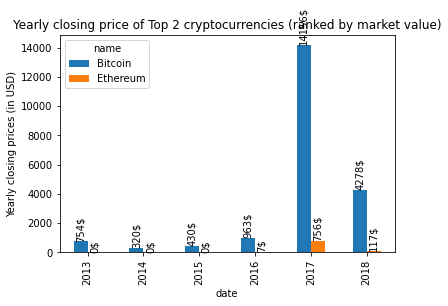

In [ ]:
yearly_closing_prices_bitcoin_and_ethereum = closing_prices_bitcoin_and_ethereum.groupby(closing_prices_bitcoin_and_ethereum.date.dt.year).last()
yearly_closing_prices_bitcoin_and_ethereum.drop(columns='date', inplace=True)
plot_with_textvalue(yearly_closing_prices_bitcoin_and_ethereum)
plt.title("Yearly closing price of Top 2 cryptocurrencies (ranked by market value)")

Text(0.5, 1.0, 'Yearly closing price of Top 3 cryptocurrencies (ranked by last closing price)')

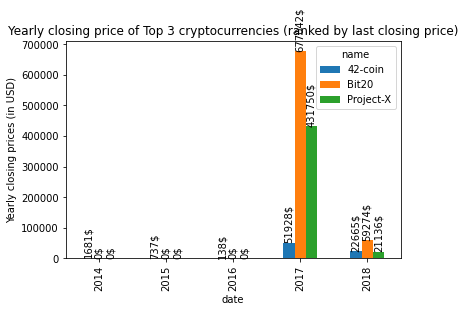

In [ ]:
yearly_closing_prices_bit20_42coin_and_projx = closing_prices_bit20_42coin_and_projx.groupby(closing_prices_bit20_42coin_and_projx.date.dt.year).last()
yearly_closing_prices_bit20_42coin_and_projx.drop(columns='date', inplace=True)
plot_with_textvalue(yearly_closing_prices_bit20_42coin_and_projx)
plt.title("Yearly closing price of Top 3 cryptocurrencies (ranked by last closing price)")

Text(0.5, 1.0, 'Yearly closing price of other currencies by market cap')

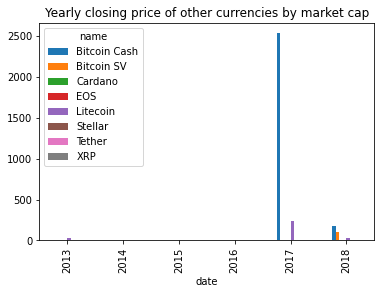

In [ ]:
yearly_closing_prices_other_currencies_mc = closing_prices_other_currencies_mc.groupby(closing_prices_other_currencies_mc.date.dt.year).last()
yearly_closing_prices_other_currencies_mc.drop(columns='date', inplace=True)
yearly_closing_prices_other_currencies_mc.plot(kind='bar')
plt.title("Yearly closing price of other currencies by market cap")

Text(0.5, 1.0, 'Yearly closing price of other currencies by last closing price ')

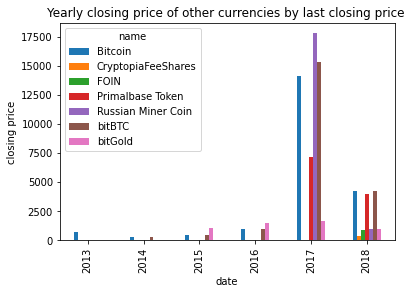

In [ ]:
yearly_closing_prices_other_currencies_lc = closing_prices_other_currencies_lc.groupby(closing_prices_other_currencies_lc.date.dt.year).last()
yearly_closing_prices_other_currencies_lc.drop(columns='date', inplace=True)
yearly_closing_prices_other_currencies_lc.plot(kind='bar')
plt.ylabel("closing price")
plt.title("Yearly closing price of other currencies by last closing price ")

In [ ]:
df_BTC = df[df['symbol']=='BTC']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

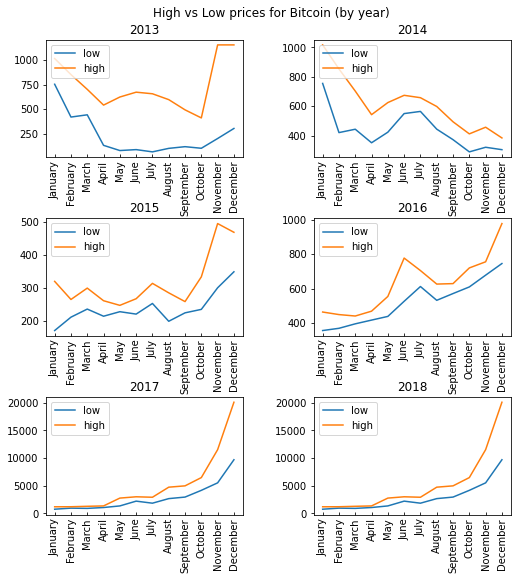

In [ ]:
import plotly.graph_objects as go

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (8,8))

fig.tight_layout(pad=4)
fig.suptitle("High vs Low prices for Bitcoin (by year)")

y_2013 = df_BTC.loc[(df_BTC['date'] >= '28-04-2013')
                     & (df_BTC['date'] < '01-01-2015')]
df_BTC['date'] = pd.to_datetime(df_BTC.date)
monthvise_2013= y_2013.groupby(y_2013['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise_2013 = monthvise_2013.reindex(new_order, axis=0)
monthvise_low_2013 = y_2013.groupby(y_2013['date'].dt.strftime('%B'))['low'].min()
monthvise_low_2013 = monthvise_low_2013.reindex(new_order, axis=0)

monthvise_high_2013 = y_2013.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_high_2013 = monthvise_high_2013.reindex(new_order, axis=0)

ax1.plot(monthvise_low_2013.index,monthvise_low_2013, label="low")
ax1.plot(monthvise_high_2013.index,monthvise_high_2013, label="high")
ax1.set_title('2013')
ax1.legend(loc='upper left')
ax1.tick_params(axis="x", direction="in", labelrotation = 90)


y_2014 = df_BTC.loc[(df_BTC['date'] >= '01-01-2014')
                     & (df_BTC['date'] < '01-01-2015')]
df_BTC['date'] = pd.to_datetime(df_BTC.date)
monthvise_2014= y_2014.groupby(y_2014['date'].dt.strftime('%B'))[['open','close']].mean()
monthvise_2014 = monthvise_2014.reindex(new_order, axis=0)
monthvise_low_2014 = y_2014.groupby(y_2014['date'].dt.strftime('%B'))['low'].min()
monthvise_low_2014 = monthvise_low_2014.reindex(new_order, axis=0)

monthvise_high_2014 = y_2014.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_high_2014 = monthvise_high_2014.reindex(new_order, axis=0)

ax2.plot(monthvise_low_2014.index,monthvise_low_2014, label="low")
ax2.plot(monthvise_high_2014.index,monthvise_high_2014, label="high")
ax2.set_title('2014')
ax2.legend(loc='upper left')
ax2.tick_params(axis="x", direction="in", labelrotation = 90)

y_2015 = df_BTC.loc[(df_BTC['date'] >= '01-01-2015')
                     & (df_BTC['date'] < '01-01-2016')]
df_BTC['date'] = pd.to_datetime(df_BTC.date)
monthvise_2015= y_2015.groupby(y_2015['date'].dt.strftime('%B'))[['open','close']].mean()
monthvise_2015 = monthvise_2015.reindex(new_order, axis=0)
monthvise_low_2015 = y_2015.groupby(y_2015['date'].dt.strftime('%B'))['low'].min()
monthvise_low_2015 = monthvise_low_2015.reindex(new_order, axis=0)

monthvise_high_2015 = y_2015.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_high_2015 = monthvise_high_2015.reindex(new_order, axis=0)

ax3.plot(monthvise_low_2015.index,monthvise_low_2015, label="low")
ax3.plot(monthvise_high_2015.index,monthvise_high_2015, label="high")
ax3.set_title('2015')
ax3.legend(loc='upper left')
ax3.tick_params(axis="x", direction="in", labelrotation = 90)

y_2016 = df_BTC.loc[(df_BTC['date'] >= '01-01-2016')
                     & (df_BTC['date'] < '01-01-2017')]
df_BTC['date'] = pd.to_datetime(df_BTC.date)
monthvise_2016= y_2016.groupby(y_2016['date'].dt.strftime('%B'))[['open','close']].mean()
monthvise_2016 = monthvise_2016.reindex(new_order, axis=0)
monthvise_low_2016 = y_2016.groupby(y_2016['date'].dt.strftime('%B'))['low'].min()
monthvise_low_2016 = monthvise_low_2016.reindex(new_order, axis=0)

monthvise_high_2016 = y_2016.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_high_2016 = monthvise_high_2016.reindex(new_order, axis=0)

ax4.plot(monthvise_low_2016.index,monthvise_low_2016, label="low")
ax4.plot(monthvise_high_2016.index,monthvise_high_2016, label="high")
ax4.set_title('2016')
ax4.legend(loc='upper left')
ax4.tick_params(axis="x", direction="in", labelrotation = 90)

y_2017 = df_BTC.loc[(df_BTC['date'] >= '01-01-2017')
                     & (df_BTC['date'] < '01-01-2018')]
df_BTC['date'] = pd.to_datetime(df_BTC.date)
monthvise_2017= y_2017.groupby(y_2017['date'].dt.strftime('%B'))[['open','close']].mean()
monthvise_2017 = monthvise_2017.reindex(new_order, axis=0)
monthvise_low_2017 = y_2017.groupby(y_2017['date'].dt.strftime('%B'))['low'].min()
monthvise_low_2017 = monthvise_low_2017.reindex(new_order, axis=0)
monthvise_high_2017 = y_2017.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_high_2017 = monthvise_high_2017.reindex(new_order, axis=0)

ax5.plot(monthvise_low_2017.index,monthvise_low_2017, label="low")
ax5.plot(monthvise_high_2017.index,monthvise_high_2017, label="high")
ax5.set_title('2017')
ax5.legend(loc='upper left')
ax5.tick_params(axis="x", direction="in", labelrotation = 90)

y_2018 = df_BTC.loc[(df_BTC['date'] >= '01-01-2018')
                     & (df_BTC['date'] < '30-11-2018')]
df_BTC['date'] = pd.to_datetime(df_BTC.date)
monthvise_2018= y_2018.groupby(y_2018['date'].dt.strftime('%B'))[['open','close']].mean()
monthvise_2018 = monthvise_2018.reindex(new_order, axis=0)
monthvise_low_2018 = y_2018.groupby(y_2018['date'].dt.strftime('%B'))['low'].min()
monthvise_low_2018 = monthvise_low_2018.reindex(new_order, axis=0)

monthvise_high_2018 = y_2018.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_high_2018 = monthvise_high_2018.reindex(new_order, axis=0)

ax6.plot(monthvise_low_2018.index,monthvise_low_2017, label="low")
ax6.plot(monthvise_high_2018.index,monthvise_high_2017, label="high")
ax6.set_title('2018')
ax6.legend(loc='upper left')
ax6.tick_params(axis="x", direction="in", labelrotation = 90)

In [ ]:
monthvise_2013

,open,close
date,,
January,841.702258,844.168387
February,670.839286,661.618214
March,595.781935,592.200323
April,432.218485,432.079697
May,300.641613,303.321935
June,362.039500,361.839167
July,355.042419,354.268710
August,326.364839,324.996613
September,289.140667,287.623833


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

Text(0.5, 1.0, 'Gap between Highest and Lowest Values')

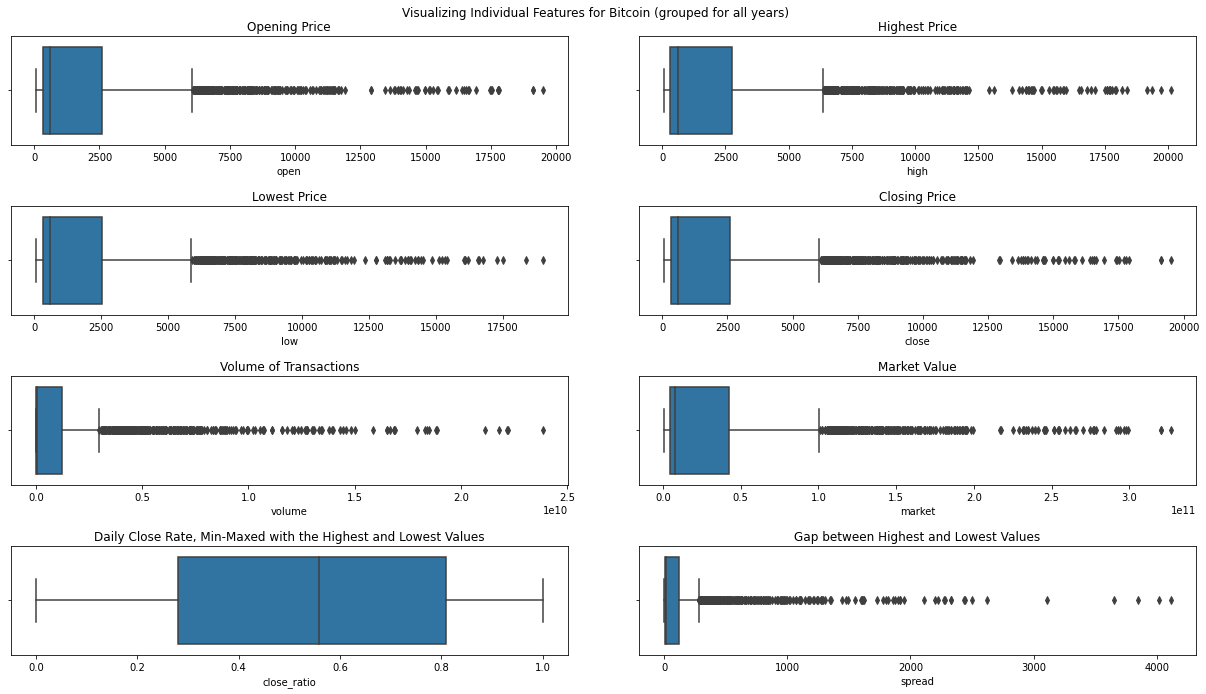

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(18, 10))
fig.tight_layout(pad=4)
fig.suptitle("Visualizing Individual Features for Bitcoin (grouped for all years)")
sns.boxplot(df_BTC['open'], ax=axes[0, 0]).set_title('Opening Price')
sns.boxplot(df_BTC['high'], ax=axes[0, 1]).set_title('Highest Price')
sns.boxplot(df_BTC['low'], ax=axes[1, 0]).set_title('Lowest Price')
sns.boxplot(df_BTC['close'], ax=axes[1, 1]).set_title('Closing Price')
sns.boxplot(df_BTC['volume'], ax=axes[2, 0]).set_title('Volume of Transactions')
sns.boxplot(df_BTC['market'], ax=axes[2, 1]).set_title('Market Value')
sns.boxplot(df_BTC['close_ratio'], ax=axes[3, 0]).set_title('Daily Close Rate, Min-Maxed with the Highest and Lowest Values')
sns.boxplot(df_BTC['spread'], ax=axes[3, 1]).set_title('Gap between Highest and Lowest Values')